# Storytelling:  

In [1]:
# envivormental imports:
import final_wrangle as wr
import final_explore as ex
import final_modeling as md


#core imports: 
import numpy as np
import pandas as pd
from scipy import stats 


#visualizations:
import matplotlib.pyplot as plt
import seaborn as sns

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the wine dataframe: 
df = wr.wine_df()

In [3]:
# clean the data
clean_df = wr.clean_wine(wr.wine_df())

In [4]:
# remove the outliers
clean_df = wr.remove_outliers(clean_df, 3)

In [5]:
# split the data into train, validate, and test:
target = 'quality'
train, validate, test = wr.split_data(clean_df, target)

Alchol conent compared to wine qaulity: 

In [6]:
train['alcohol_bins'] = pd.cut(train.alcohol,[8,10,12,15], labels=['low','medium','high'])
train['alcohol_bins2'] = pd.cut(train.alcohol,[8,11,15], labels=['low','high'])
train['alcohol_bins3'] = pd.cut(train.alcohol,[8,10,12,14,15], labels=['very low','low','medium','high'])

In [7]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,is_white,alcohol_bins,alcohol_bins2,alcohol_bins3
621,8.2,0.56,0.23,3.4,0.078,14.0,104.0,0.99760,3.28,0.62,9.4,5.0,red,1.0,low,low,very low
3092,8.0,0.34,0.49,9.0,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,8.0,white,0.0,high,high,medium
5926,6.4,0.24,0.26,8.2,0.054,47.0,182.0,0.99538,3.12,0.50,9.5,5.0,white,0.0,low,low,very low
661,7.5,0.42,0.31,1.6,0.080,15.0,42.0,0.99780,3.31,0.64,9.0,5.0,red,1.0,low,low,very low
1140,7.3,0.40,0.30,1.7,0.080,33.0,79.0,0.99690,3.41,0.65,9.5,6.0,red,1.0,low,low,very low


In [8]:
train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white
count,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000
mean,7.095592,0.329295,0.313205,5.573782,0.051185,30.917343,117.634861,0.994548,3.219951,0.522546,10.508137,5.859919,0.218968
std,1.096385,0.151969,0.138920,4.752775,0.019939,16.902899,54.741940,0.002897,0.159749,0.130430,1.198563,0.864700,0.413607
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,7.000000,0.987220,2.740000,0.230000,8.000000,3.000000,0.000000
25%,6.400000,0.220000,0.250000,1.800000,0.037000,18.000000,84.000000,0.992147,3.110000,0.430000,9.500000,5.000000,0.000000
50%,6.900000,0.290000,0.310000,3.300000,0.046000,29.000000,119.000000,0.994700,3.210000,0.500000,10.400000,6.000000,0.000000
75%,7.600000,0.390000,0.390000,8.325000,0.059000,42.000000,156.000000,0.996800,3.320000,0.590000,11.400000,6.000000,0.000000
max,11.500000,0.900000,0.800000,26.050000,0.133000,112.000000,344.000000,1.002950,3.900000,1.050000,14.200000,9.000000,1.000000


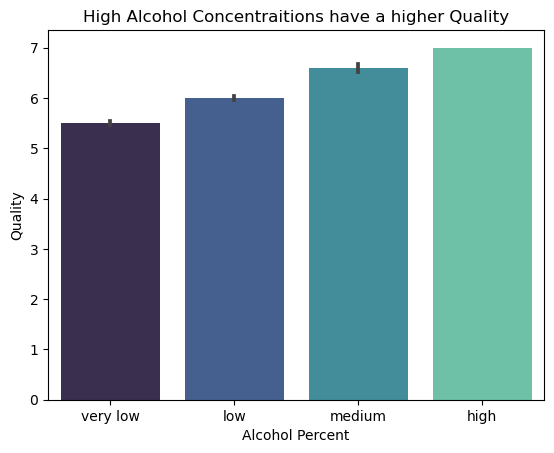

In [9]:
sns.barplot(y = 'quality', x = 'alcohol_bins3', data = train, palette = 'mako')
plt.xlabel('Alcohol Percent')
plt.ylabel('Quality')
plt.title('High Alcohol Concentraitions have a higher Quality')
plt.show()

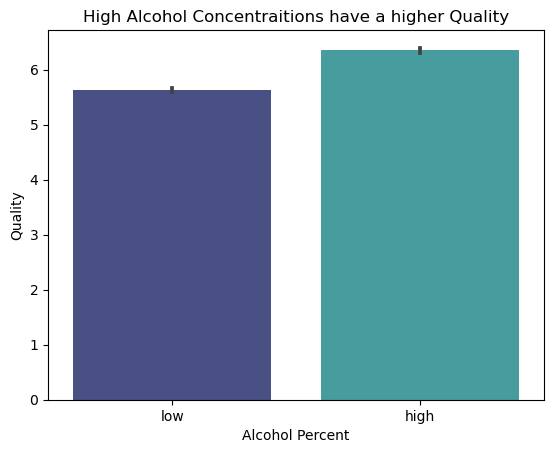

In [10]:
sns.barplot(y = 'quality', x = 'alcohol_bins2', data = train, palette = 'mako')
plt.xlabel('Alcohol Percent')
plt.ylabel('Quality')
plt.title('High Alcohol Concentraitions have a higher Quality')
plt.show()

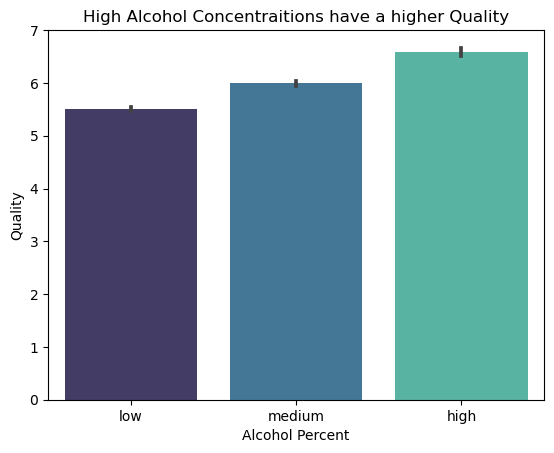

In [11]:
sns.barplot(y = 'quality', x = 'alcohol_bins', data = train, palette = 'mako')
plt.xlabel('Alcohol Percent')
plt.ylabel('Quality')
plt.title('High Alcohol Concentraitions have a higher Quality')
plt.show()

Graph for sulphates: 

In [12]:
train['volatile_bins'] = pd.cut(train.volatile_acidity,[0.08,0.3,0.5,0.7,0.90], labels=['low', 'moderate','high','very high'])
train['volatile_bins2'] = pd.cut(train.volatile_acidity,[0.08,0.4,0.7,0.9], labels=['low','medium','high'])
train['volatile_bins3'] = pd.cut(train.volatile_acidity,[0.08,0.6,0.9], labels=['low','high'])

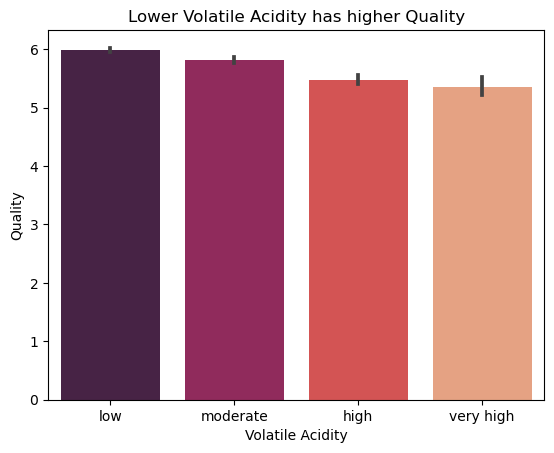

In [15]:
sns.barplot(y = 'quality', x = 'volatile_bins', data = train, palette = 'rocket')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Lower Volatile Acidity has higher Quality')
plt.show()

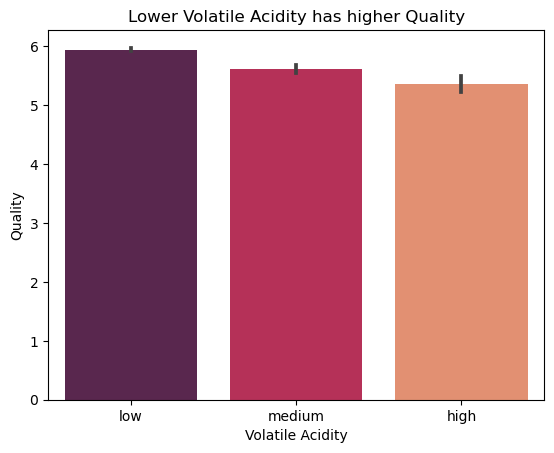

In [17]:
sns.barplot(y = 'quality', x = 'volatile_bins2', data = train, palette = 'rocket')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Lower Volatile Acidity has higher Quality')
plt.show()

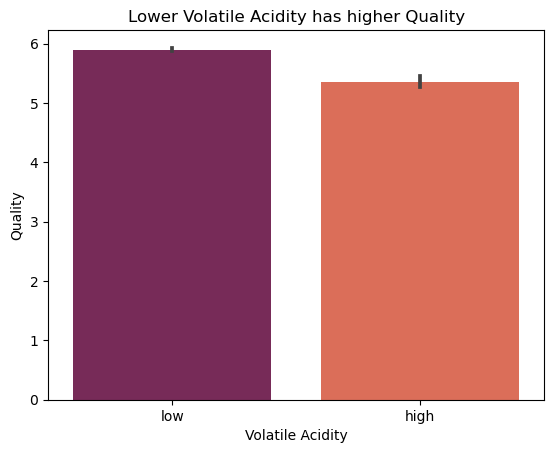

In [18]:
sns.barplot(y = 'quality', x = 'volatile_bins3', data = train, palette = 'rocket')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Lower Volatile Acidity has higher Quality')
plt.show()

Residual Sugar: 

In [20]:
train['residual_bin'] = pd.cut(train.residual_sugar,[0.6,5,10, 15, 26.05], labels=['low', 'moderate','high','very high'])
train['residual_bins2'] = pd.cut(train.residual_sugar,[0.6, 10, 20, 26.05], labels=['low','medium','high'])
train['residual_bins3'] = pd.cut(train.residual_sugar, [0.6, 13, 26.05], labels=['low','high'])

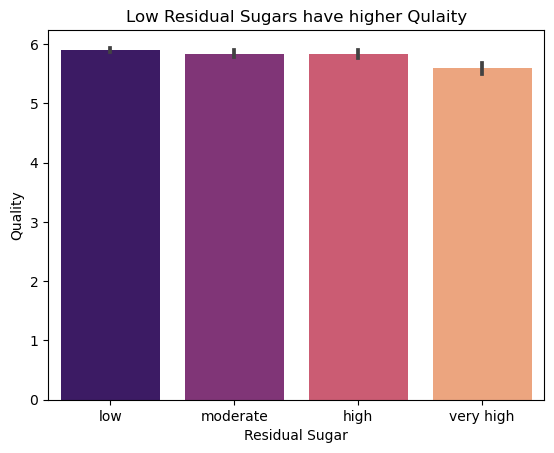

In [24]:
sns.barplot(y = 'quality', x = 'residual_bin', data = train, palette = 'magma')
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.title('Low Residual Sugars have higher Qulaity')
plt.show()

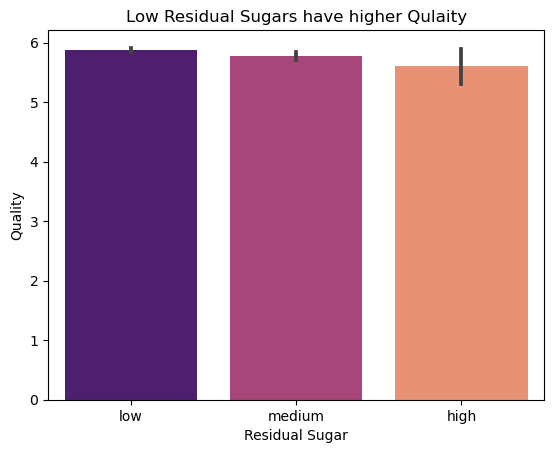

In [25]:
sns.barplot(y = 'quality', x = 'residual_bins2', data = train, palette = 'magma')
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.title('Low Residual Sugars have higher Qulaity')
plt.show()

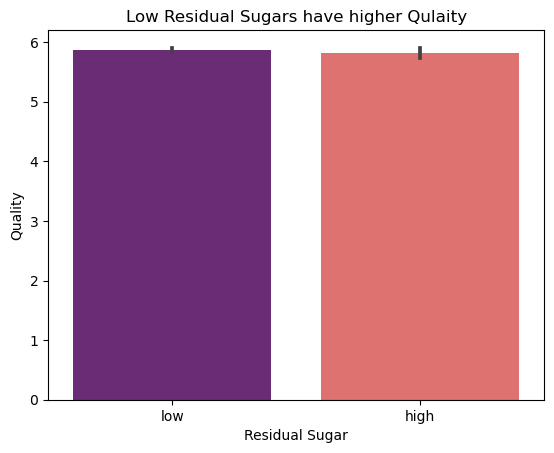

In [26]:
sns.barplot(y = 'quality', x = 'residual_bins3', data = train, palette = 'magma')
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.title('Low Residual Sugars have higher Qulaity')
plt.show()